# Análisis de Rotación de Empleados – People Analytics

Este proyecto explora posibles factores que influyen en la rotación de empleados utilizando un dataset de IBM.  
Se analizan variables como el ingreso mensual, la satisfacción laboral, el desempeño y el departamento, con el objetivo de ofrecer información útil para la toma de decisiones en Recursos Humanos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
# Cargar el dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Mostrar las primeras filas
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Verificar dimensiones del dataset
print("Filas y columnas:", df.shape)

# Verificar tipos de datos
df.info()

# Revisar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Filas y columnas: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 


## 1. Rotación general de empleados


In [4]:
# Conteo de empleados que se fueron vs se quedaron
rotacion_counts = df["Attrition"].value_counts()
print("Conteo de empleados:")
print(rotacion_counts)

# Porcentaje
rotacion_percent = df["Attrition"].value_counts(normalize=True) * 100
print("\nPorcentaje de rotación:")
print(rotacion_percent)


Conteo de empleados:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Porcentaje de rotación:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


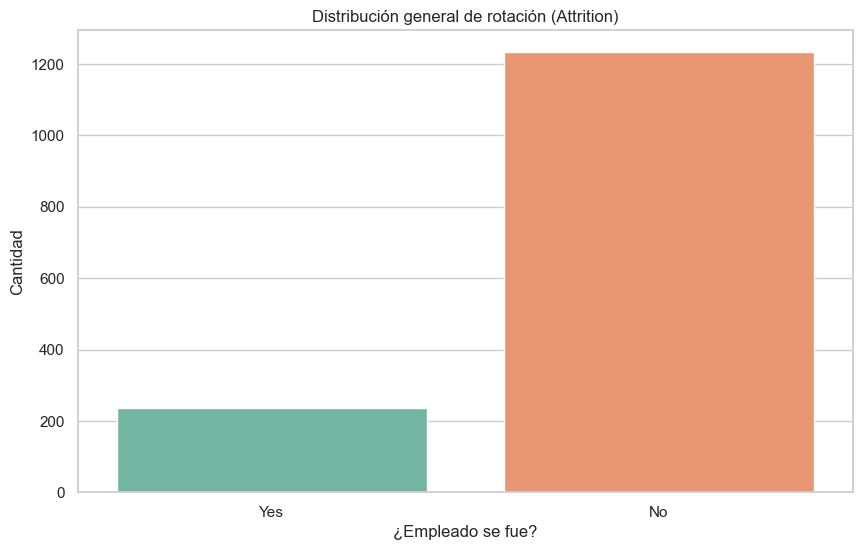

In [5]:
# Gráfico de barras con Seaborn
sns.countplot(data=df, x="Attrition", hue="Attrition", palette="Set2")
plt.title("Distribución general de rotación (Attrition)")
plt.xlabel("¿Empleado se fue?")
plt.ylabel("Cantidad")
plt.show()

### Observaciones
- El **~16%** de los empleados han dejado la empresa.
- La mayoría permanece en sus puestos, pero esta tasa de rotación puede ser preocupante si afecta áreas clave o perfiles estratégicos.


## 2. Rotación vs Ingresos


In [6]:
# Estadísticas de ingresos según rotación
df.groupby("Attrition")["MonthlyIncome"].describe()


,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,6832.739659,4818.208001,1051.0,3211.0,5204.0,8834.0,19999.0
Yes,237.0,4787.092827,3640.210367,1009.0,2373.0,3202.0,5916.0,19859.0


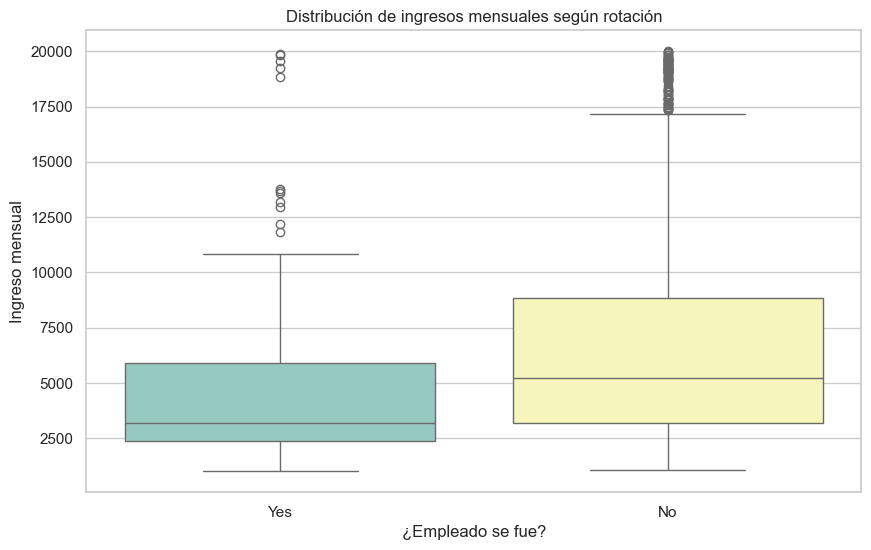

In [7]:
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", hue="Attrition", palette="Set3", dodge=False)
plt.title("Distribución de ingresos mensuales según rotación")
plt.xlabel("¿Empleado se fue?")
plt.ylabel("Ingreso mensual")
plt.show()

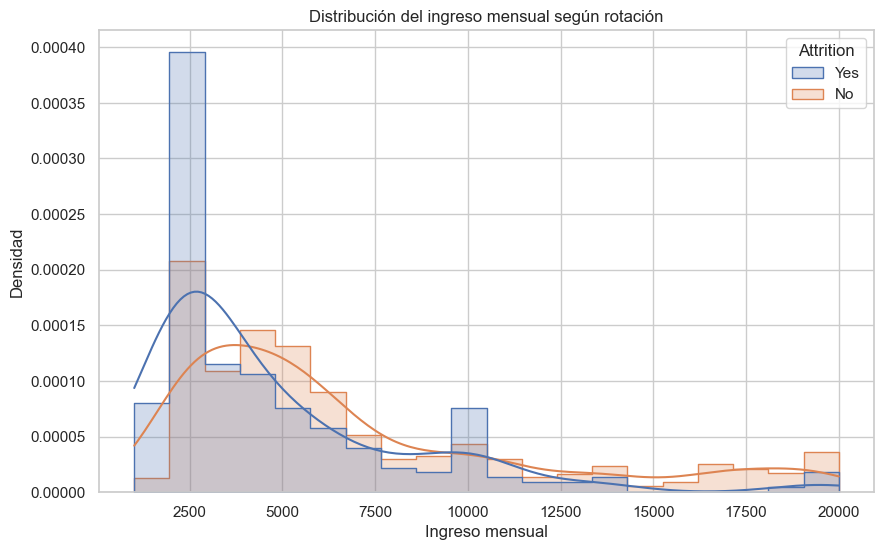

In [8]:
# Histograma de ingresos separados por grupo de rotación
sns.histplot(data=df, x="MonthlyIncome", hue="Attrition", kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribución del ingreso mensual según rotación")
plt.xlabel("Ingreso mensual")
plt.ylabel("Densidad")
plt.show()


### Observaciones
- Los empleados que se fueron tienden a tener ingresos ligeramente más bajos en promedio.
- Sin embargo, también hay solapamiento: hay empleados con altos ingresos que se van, y bajos que se quedan.
- Esto sugiere que el ingreso puede ser un **factor relevante**, pero no el único.


## 3. Rotación vs Satisfacción laboral


In [9]:
# Promedio y estadísticas de satisfacción por grupo
df.groupby("Attrition")["JobSatisfaction"].describe()


,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,2.778589,1.093277,1.0,2.0,3.0,4.0,4.0
Yes,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0


In [10]:
# Tabla cruzada: rotación vs nivel de satisfacción (de 1 a 4)
pd.crosstab(df["JobSatisfaction"], df["Attrition"], normalize='index') * 100


Attrition,No,Yes
JobSatisfaction,,
1,77.162630,22.837370
2,83.571429,16.428571
3,83.484163,16.515837
4,88.671024,11.328976


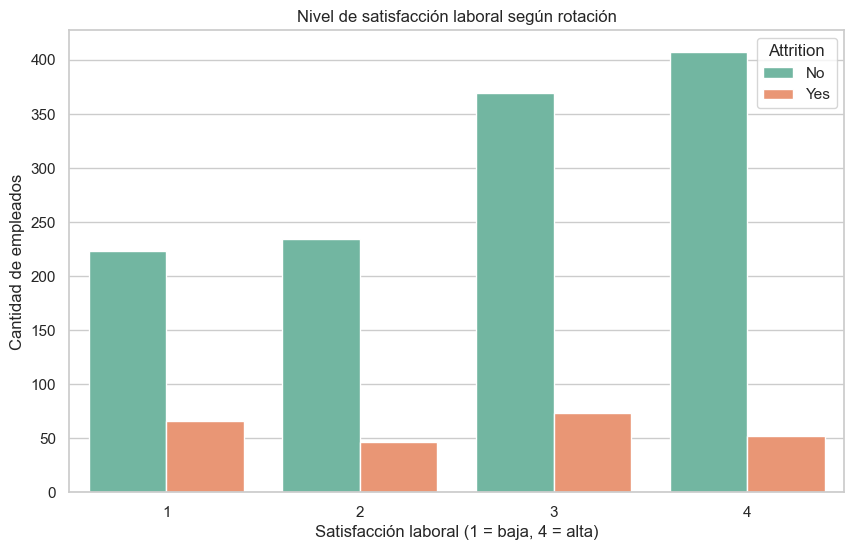

In [11]:
# Recuento de satisfacción según rotación
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition", palette="Set2")
plt.title("Nivel de satisfacción laboral según rotación")
plt.xlabel("Satisfacción laboral (1 = baja, 4 = alta)")
plt.ylabel("Cantidad de empleados")
plt.show()


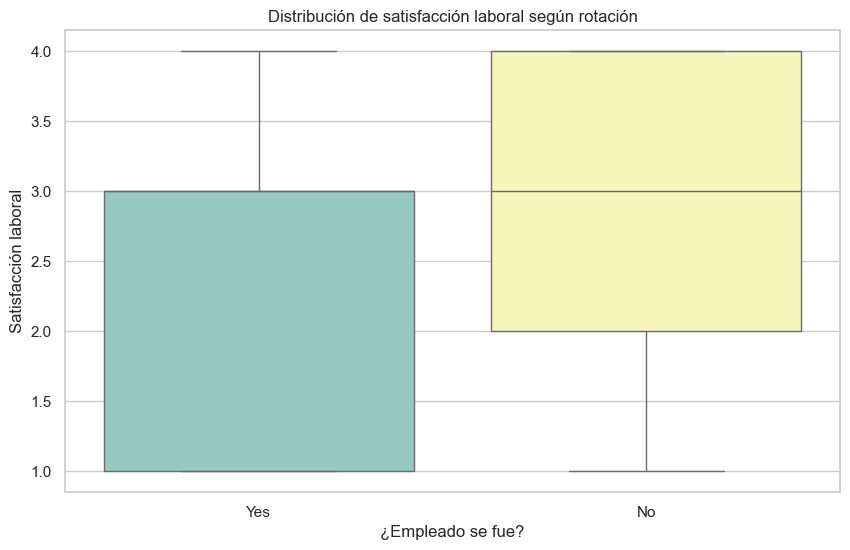

In [12]:
sns.boxplot(data=df, x="Attrition", y="JobSatisfaction", hue="Attrition", palette="Set3", dodge=False)
plt.title("Distribución de satisfacción laboral según rotación")
plt.xlabel("¿Empleado se fue?")
plt.ylabel("Satisfacción laboral")
plt.show()

### Observaciones
- Los empleados con menor satisfacción laboral tienden a irse con mayor frecuencia.
- La mayoría de los que se quedan reportan niveles de satisfacción entre 3 y 4.
- Esto sugiere una **relación clara entre satisfacción laboral y rotación**.


## 4. Relación entre satisfacción laboral y desempeño


In [13]:
# Ver la correlación numérica entre ambas variables
correlacion = df["JobSatisfaction"].corr(df["PerformanceRating"])
print(f"Correlación entre satisfacción y desempeño: {correlacion:.2f}")


Correlación entre satisfacción y desempeño: 0.00


La correlación entre satisfacción y desempeño es nula (0.00), probablemente debido a la baja variabilidad en las evaluaciones de desempeño, ya que la mayoría de los empleados tienen un puntaje similar. Esto limita la capacidad de detectar una relación estadística significativa.


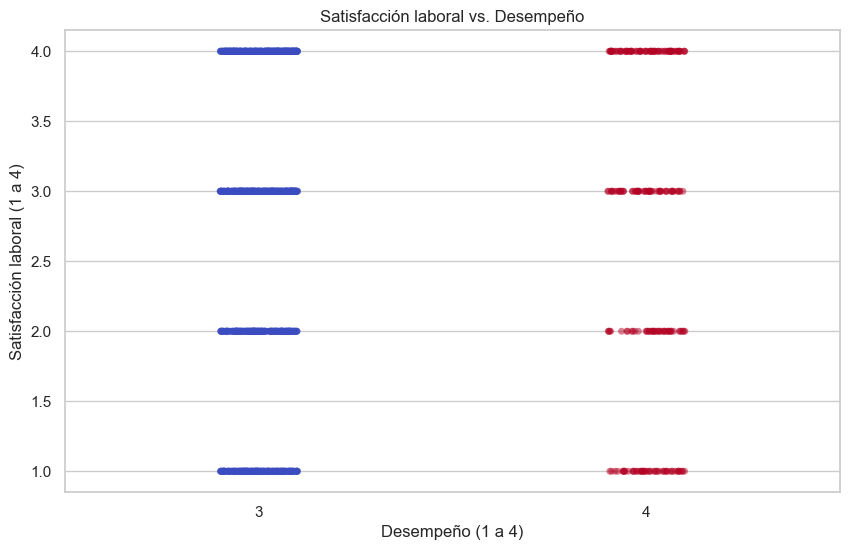

In [14]:
# Añadir un poco de "ruido" para que no se solapen los puntos
sns.stripplot(data=df, x="PerformanceRating", y="JobSatisfaction", hue="PerformanceRating", 
              palette="coolwarm", jitter=True, alpha=0.5, dodge=False, legend=False)
plt.title("Satisfacción laboral vs. Desempeño")
plt.xlabel("Desempeño (1 a 4)")
plt.ylabel("Satisfacción laboral (1 a 4)")
plt.show()

In [15]:
pd.crosstab(df["PerformanceRating"], df["JobSatisfaction"], normalize='index') * 100


JobSatisfaction,1,2,3,4
PerformanceRating,,,,
3,19.372990,19.051447,31.028939,30.546624
4,21.238938,19.026549,24.778761,34.955752


### Observaciones
- No se observa una correlación fuerte entre satisfacción y desempeño.
- Los empleados con alto desempeño no necesariamente están más satisfechos.
- Esto puede indicar que **el reconocimiento o las condiciones laborales** son más importantes que el rendimiento en sí.


## 5. Rotación por Departamento


In [16]:
# Conteo absoluto
rotacion_departamento = pd.crosstab(df["Department"], df["Attrition"])
print(rotacion_departamento)

# Porcentaje de rotación dentro de cada departamento
rotacion_percent = pd.crosstab(df["Department"], df["Attrition"], normalize='index') * 100
print("\nPorcentaje de rotación por departamento:")
print(rotacion_percent)


Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92

Porcentaje de rotación por departamento:
Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


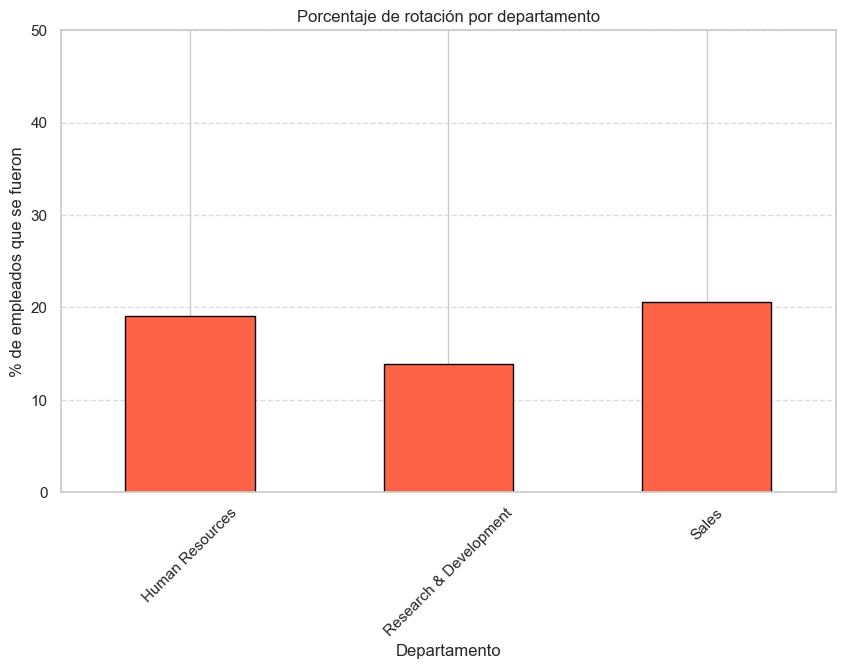

In [17]:
# Gráfico de barras con porcentaje de empleados que se fueron por departamento
rotacion_percent["Yes"].plot(kind="bar", color="tomato", edgecolor="black")
plt.title("Porcentaje de rotación por departamento")
plt.ylabel("% de empleados que se fueron")
plt.xlabel("Departamento")
plt.xticks(rotation=45)
plt.ylim(0, 50)  # ajustable según tus datos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Observaciones
- Algunos departamentos muestran una tasa de rotación mucho más alta que otros.
- Identificar estos departamentos puede ayudar a enfocar acciones de retención más efectivas.


## 6. Conclusiones generales del análisis


### Conclusiones generales

- La tasa de rotación general es del ~16%, lo cual puede considerarse moderadamente alto.  
- Los empleados con **menores ingresos** tienden a dejar la empresa con más frecuencia, lo que sugiere una posible relación entre salario y retención.
- Existe una **clara relación entre la baja satisfacción laboral y la rotación**: los empleados menos satisfechos son los más propensos a irse.
- No se encontró correlación significativa entre **satisfacción y desempeño**. Esto podría deberse a la falta de variabilidad en las evaluaciones de desempeño.
- Algunos **departamentos presentan tasas de rotación más altas** que otros. Identificar y analizar estos focos puede ayudar a tomar decisiones estratégicas de retención.
- En conjunto, los resultados destacan la importancia de **evaluar factores emocionales y económicos** para retener el talento dentro de una organización.
